## library type SJ comparison

In [62]:
!date

Sun Jan 15 17:31:30 PST 2023


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/squint_2


In [3]:
import pandas as pd
import scanpy as sc
import anndata

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sc.set_figure_params(dpi=160)

In [4]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/'

In [5]:
output_dir = '/c4/home/derek/data1/derek/scSLR/notebooks/fig2/plots/'
os.makedirs(output_dir, exist_ok=True)

In [6]:
input_dir_internal_1= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_internal/Solo.out/SJ/raw/'

adata_internal_1 = sc.read_mtx(input_dir_internal_1 + 'matrix.mtx').T
adata_internal_1.obs_names = pd.read_csv(input_dir_internal_1+'barcodes.tsv',header=None)[0]

adata_internal_1.var = pd.read_csv(input_dir_internal_1+'SJ.out.tab',header=None,sep='\t', usecols=[0,1,2,3,4],names=['chromosome', 'start', 'end', 'strand', 'intron_motif'])

annot = pd.read_csv(input_dir_internal_1+'SJ.out.tab',header=None,sep='\t')

adata_internal_1.var_names = annot[0].astype('str') + ':' + annot[1].astype('str') + '-' + annot[2].astype('str')

In [7]:
adata_internal_1

AnnData object with n_obs × n_vars = 737280 × 821716
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif'

In [8]:
input_dir_internal_2= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/StarOut_internal/Solo.out/SJ/raw/'

adata_internal_2 = sc.read_mtx(input_dir_internal_2 + 'matrix.mtx').T
adata_internal_2.obs_names = pd.read_csv(input_dir_internal_2+'barcodes.tsv',header=None)[0]

adata_internal_2.var = pd.read_csv(input_dir_internal_2+'SJ.out.tab',header=None,sep='\t', usecols=[0,1,2,3,4],names=['chromosome', 'start', 'end', 'strand', 'intron_motif'])

annot = pd.read_csv(input_dir_internal_2+'SJ.out.tab',header=None,sep='\t')

adata_internal_2.var_names = annot[0].astype('str') + ':' + annot[1].astype('str') + '-' + annot[2].astype('str')

In [9]:
adata_internal_2

AnnData object with n_obs × n_vars = 737280 × 831955
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif'

In [10]:
input_dir_5prime_1= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_5prime/Solo.out/SJ/raw/'

adata_5prime_1 = sc.read_mtx(input_dir_5prime_1 + 'matrix.mtx').T
adata_5prime_1.obs_names = pd.read_csv(input_dir_5prime_1+'barcodes.tsv',header=None)[0]

adata_5prime_1.var = pd.read_csv(input_dir_5prime_1+'SJ.out.tab',header=None,sep='\t', usecols=[0,1,2,3,4],names=['chromosome', 'start', 'end', 'strand', 'intron_motif'])

annot = pd.read_csv(input_dir_5prime_1+'SJ.out.tab',header=None,sep='\t')

adata_5prime_1.var_names = annot[0].astype('str') + ':' + annot[1].astype('str') + '-' + annot[2].astype('str')

In [11]:
adata_5prime_1

AnnData object with n_obs × n_vars = 737280 × 481398
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif'

In [12]:
input_dir_5prime_2= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/StarOut_5prime/Solo.out/SJ/raw/'

adata_5prime_2 = sc.read_mtx(input_dir_5prime_2 + 'matrix.mtx').T
adata_5prime_2.obs_names = pd.read_csv(input_dir_5prime_2+'barcodes.tsv',header=None)[0]

adata_5prime_2.var = pd.read_csv(input_dir_5prime_2+'SJ.out.tab',header=None,sep='\t', usecols=[0,1,2,3,4],names=['chromosome', 'start', 'end', 'strand', 'intron_motif'])

annot = pd.read_csv(input_dir_5prime_2+'SJ.out.tab',header=None,sep='\t')

adata_5prime_2.var_names = annot[0].astype('str') + ':' + annot[1].astype('str') + '-' + annot[2].astype('str')

In [13]:
adata_5prime_2

AnnData object with n_obs × n_vars = 737280 × 481918
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif'

In [14]:
adata_internal_1.var_names_make_unique()
adata_internal_2.var_names_make_unique()

adata_5prime_1.var_names_make_unique()
adata_5prime_2.var_names_make_unique()

In [15]:
annotations_1 = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/PBMC_sample_1_idents.csv',sep='\t',header=None,index_col=0,names=['celltype'])
annotations_2 = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/PBMC_sample_2_idents.csv',sep='\t',header=None,index_col=0,names=['celltype'])

In [16]:
adata_internal_1 = adata_internal_1[adata_internal_1.obs_names.isin(annotations_1.index)]
adata_internal_2 = adata_internal_2[adata_internal_2.obs_names.isin(annotations_2.index)]

adata_internal_1.obs['celltype'] = annotations_1['celltype']
adata_internal_2.obs['celltype'] = annotations_2['celltype']

adata_5prime_1 = adata_5prime_1[adata_5prime_1.obs_names.isin(annotations_1.index)]
adata_5prime_2 = adata_5prime_2[adata_5prime_2.obs_names.isin(annotations_2.index)]

adata_5prime_1.obs['celltype'] = annotations_1['celltype']
adata_5prime_2.obs['celltype'] = annotations_2['celltype']

/scratch/derek/ipykernel_48848/3105132940.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_internal_1.obs['celltype'] = annotations_1['celltype']
/scratch/derek/ipykernel_48848/3105132940.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_internal_2.obs['celltype'] = annotations_2['celltype']
/scratch/derek/ipykernel_48848/3105132940.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5prime_1.obs['celltype'] = annotations_1['celltype']
/scratch/derek/ipykernel_48848/3105132940.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5prime_2.obs['celltype'] = annotations_2['celltype']


In [17]:
adata_internal = adata_internal_1.concatenate(adata_internal_2,join='outer',fill_value=0)



adata_5prime = adata_5prime_1.concatenate(adata_5prime_2,join='outer',fill_value=0)

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [18]:
adata_internal.var = adata_internal.var.groupby(adata_internal.var.columns.str.split('-').str[0], axis=1).first()

adata_5prime.var = adata_5prime.var.groupby(adata_5prime.var.columns.str.split('-').str[0], axis=1).first()




In [19]:
adata = adata_5prime.concatenate([adata_internal],
                                 batch_categories=['5prime','internal'],
                                 join='outer' 
                                )

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [20]:
adata.var = adata.var.groupby(adata.var.columns.str.split('-').str[0], axis=1).first()



In [21]:
#sc.pp.filter_cells(adata,min_counts=200)
sc.pp.filter_cells(adata,min_genes=1)

In [22]:
adata

AnnData object with n_obs × n_vars = 41346 × 1411355
    obs: 'celltype', 'batch', 'n_genes'
    var: 'chromosome', 'end', 'intron_motif', 'start', 'strand'

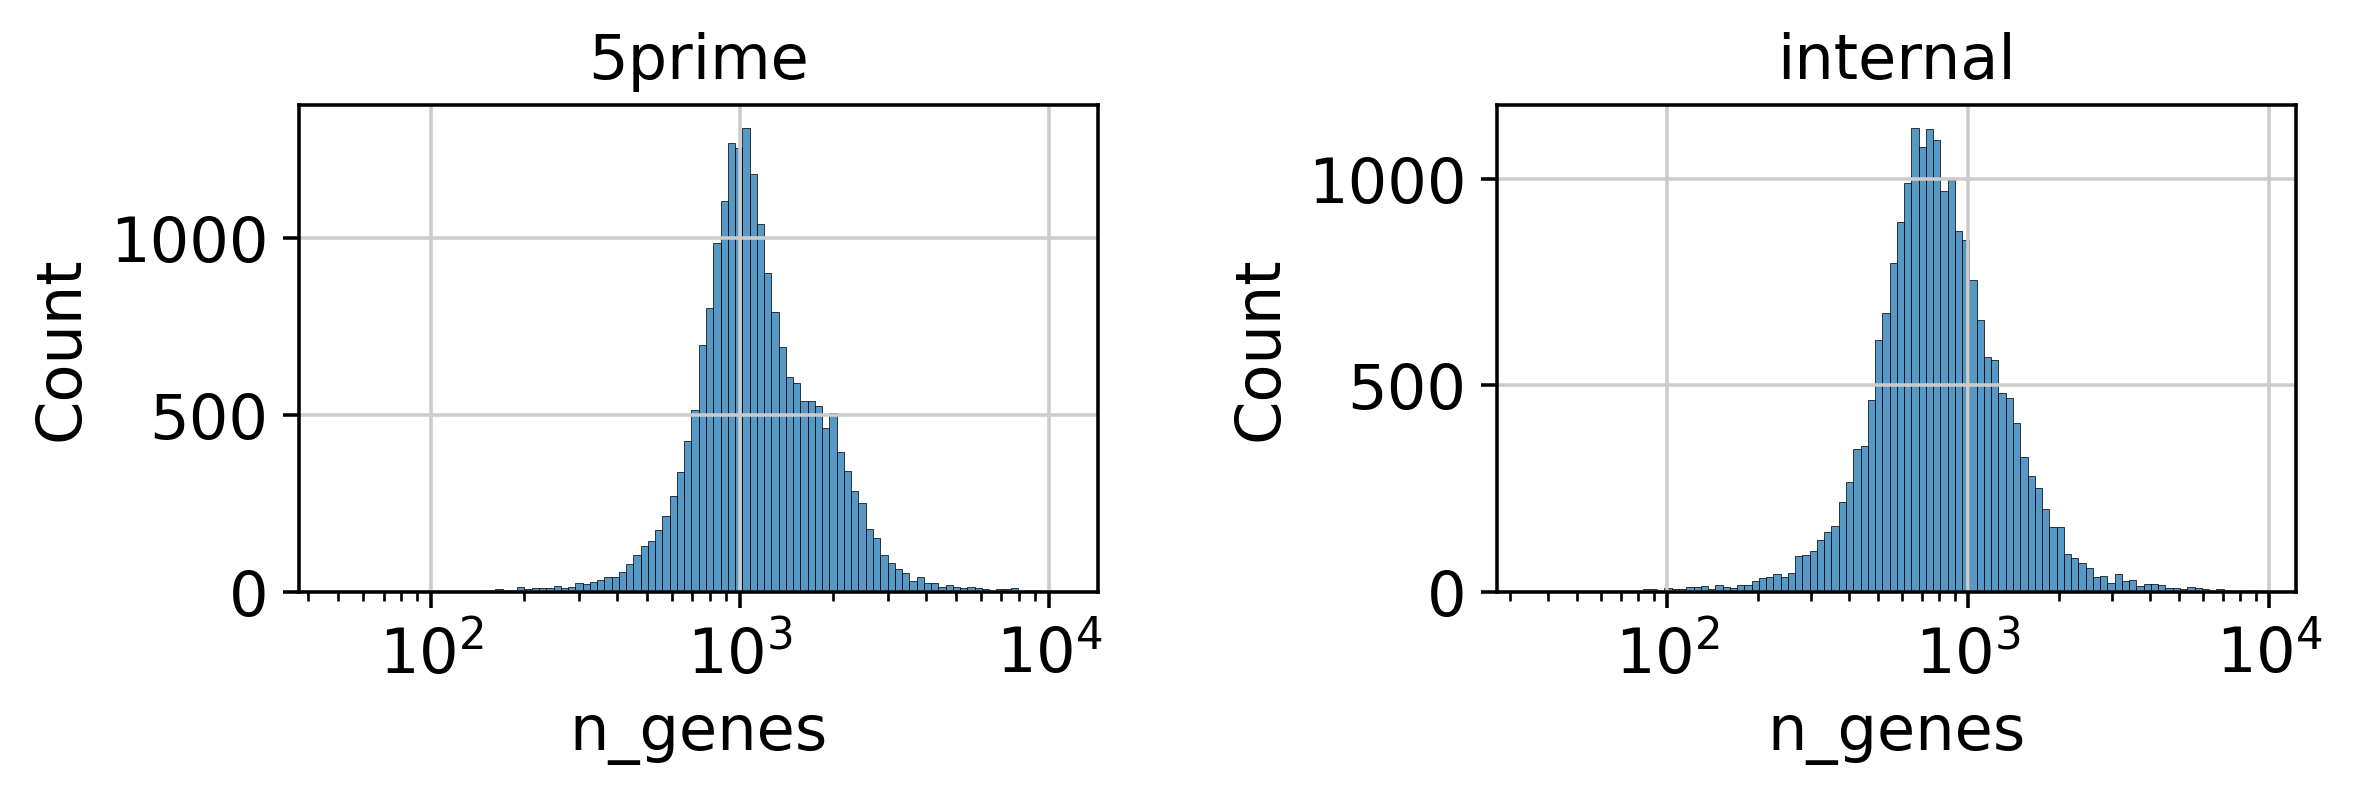

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2))

plt.subplots_adjust(wspace=0.5)

for i, ax in zip(adata.obs.batch.cat.categories.tolist(), axes.ravel()):
    sns.histplot(adata[adata.obs["batch"] == i].obs["n_genes"],ax=ax,
                 bins=100, kde=False, log_scale =True).set(title=i)

In [24]:
sc.pp.calculate_qc_metrics(adata_internal,inplace=True)
sc.pp.calculate_qc_metrics(adata_5prime,inplace=True)



In [25]:
sc.pp.calculate_qc_metrics(adata,inplace=True)



In [26]:
adata.obs['log10_n_genes'] = np.log10(adata.obs.n_genes)

adata_5prime.obs['log10_n_genes'] = np.log10(adata_5prime.obs.n_genes_by_counts)
adata_internal.obs['log10_n_genes'] = np.log10(adata_internal.obs.n_genes_by_counts)

In [27]:
# fig, ax = plt.subplots(1,1)



# sns.scatterplot(data=adata_5prime.obs,
#                 x='total_counts',
#                 y='log10_n_genes',
#                 s=1,
#                 linewidth=0,
#                 alpha=.25,
#                 ax=ax
#                )

# sns.scatterplot(data=adata_internal.obs,
#                 x='total_counts',
#                 y='log10_n_genes',
#                 s=1,
#                 linewidth=0,
#                 alpha=.25,
#                 ax=ax,
#                )

In [28]:
adata.obs['ratio'] = adata.obs.n_genes_by_counts/adata.obs.total_counts

/scratch/derek/ipykernel_48848/3829343374.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.2','0.4','0.6','0.8','1.0'],fontsize=12)


Text(0.5, 0, 'Library type')

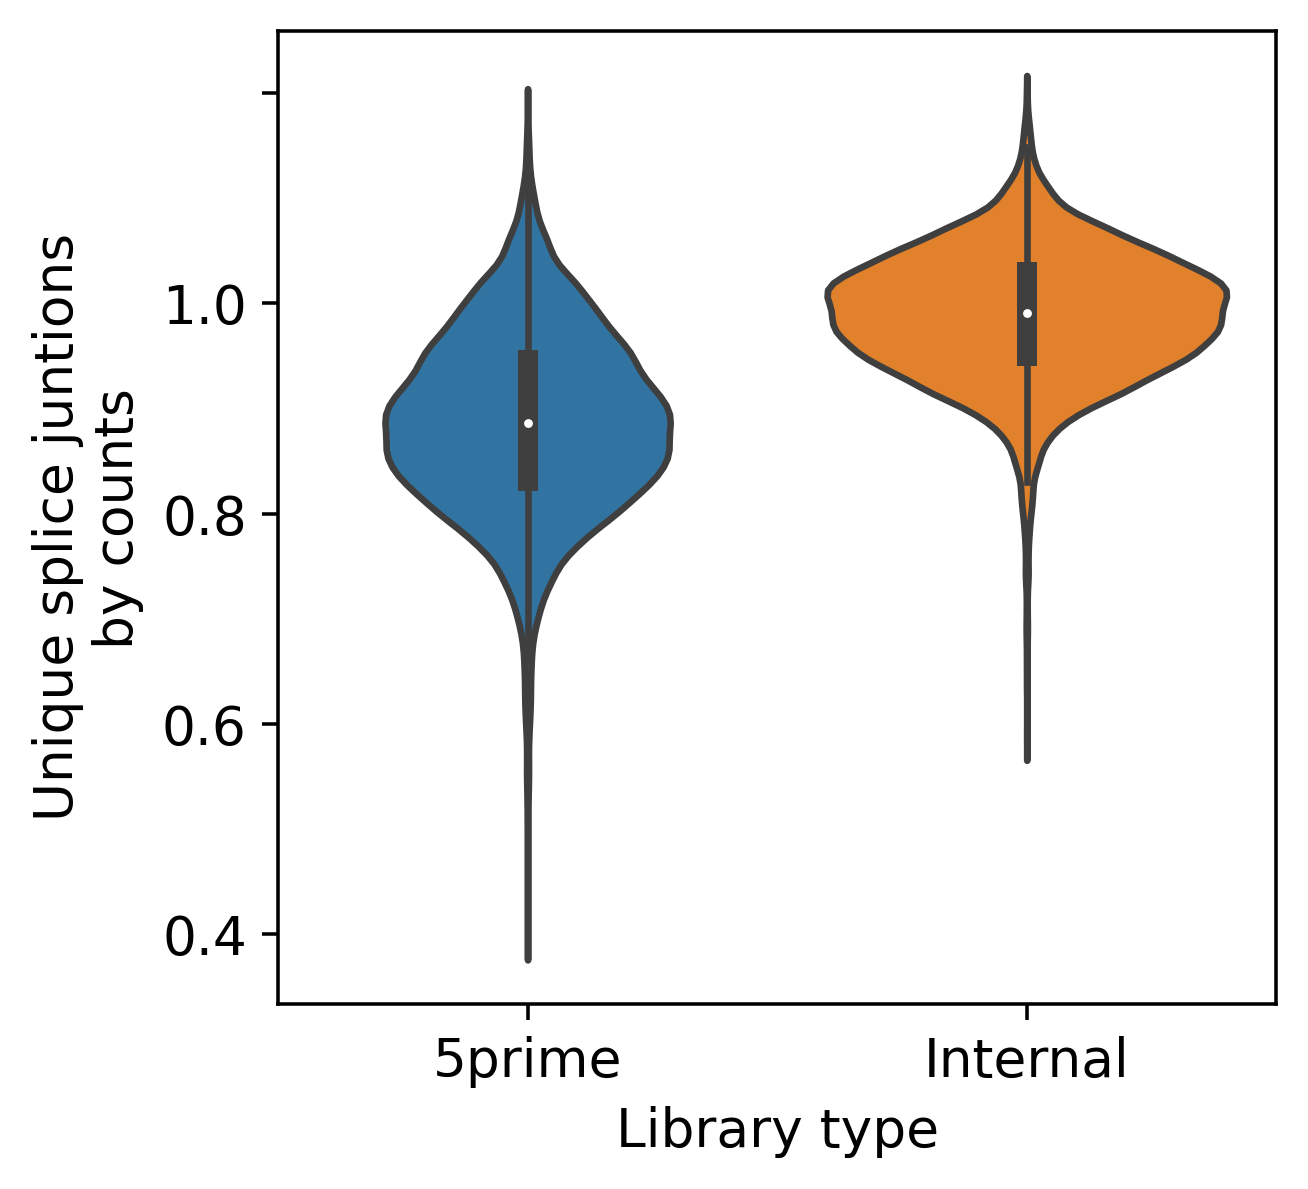

In [29]:
fig, ax = plt.subplots(1,1)

sns.violinplot(data=adata.obs, 
               x='batch',
               y='ratio', ax=ax
              )

# sns.stripplot(data=adata.obs,
#             x="batch", 
#             y="ratio", 
#                    color="black", edgecolor="gray",
#               size=.5,
#               ax=ax
#          )


ax.grid(False)

ax.set_xticklabels(['5prime', 'Internal'],fontsize=12)
ax.set_yticklabels(['0.2','0.4','0.6','0.8','1.0'],fontsize=12)



ax.set_ylabel("Unique splice juntions \n by counts ", fontsize=12)
ax.set_xlabel('Library type', fontsize=12)

#fig.savefig(output_dir + 'comparison_SJ_ratio_violins.pdf')

In [206]:
# chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]
# adata = adata[:, adata.var.chromosome.isin(chromosomes)]

In [30]:
# %%time
# ##add annotations

# gtf_path = '/c4/home/derek/data1/HDD-2/derek/reference/human_hp3_reference/genes/genes.gtf'
# filter_unique_gene=True
    
# gtf = pd.read_csv(
#     gtf_path,
#     sep="\t",
#     header=None,
#     comment="#",
#     names=[
#         "chromosome",
#         "source",
#         "feature",
#         "start",
#         "end",
#         "score",
#         "strand",
#         "frame",
#         "attribute",
#     ],
# )

# gtf = gtf[gtf.feature == "exon"]
# gtf["gene_id"] = gtf.attribute.str.extract(r'gene_id "([^;]*)";')
# gtf["gene_name"] = gtf.attribute.str.extract(r'gene_name "([^;]*)";')
# #gtf.chromosome = "chr" + gtf.chromosome.astype(str)

# gene_id_name = gtf[["gene_id", "gene_name"]].drop_duplicates()

# exon_starts = (
#     gtf[["chromosome", "start", "gene_id"]].copy().rename(columns={"start": "pos"})
# )
# exon_starts.pos -= 1
# exon_ends = (
#     gtf[["chromosome", "end", "gene_id"]].copy().rename(columns={"end": "pos"})
# )
# exon_ends.pos += 1
# exon_boundaries = pd.concat(
#     [exon_starts, exon_ends], ignore_index=True
# ).drop_duplicates()

# genes_by_exon_boundary = exon_boundaries.groupby(
#     ["chromosome", "pos"]
# ).gene_id.unique()

# adata.var = (
#     adata.var.merge(
#         genes_by_exon_boundary,
#         how="left",
#         left_on=["chromosome", "start"],
#         right_on=["chromosome", "pos"],
#     )
#     .rename(columns={"gene_id": "gene_id_start"})
#     .set_index(adata.var.index)
# )
# adata.var = (
#     adata.var.merge(
#         genes_by_exon_boundary,
#         how="left",
#         left_on=["chromosome", "end"],
#         right_on=["chromosome", "pos"],
#     )
#     .rename(columns={"gene_id": "gene_id_end"})
#     .set_index(adata.var.index)
# )

# def fill_na_with_empty_array(val):
#     return val if isinstance(val, np.ndarray) else np.array([])

# adata.var.gene_id_start = adata.var.gene_id_start.apply(fill_na_with_empty_array)
# adata.var.gene_id_end = adata.var.gene_id_end.apply(fill_na_with_empty_array)

# adata.var["gene_id_list"] = adata.var.apply(
#     lambda row: np.unique(np.concatenate([row.gene_id_start, row.gene_id_end])),
#     axis=1,
# )
# adata.var["n_genes"] = adata.var.gene_id_list.apply(len)
# adata.var.gene_id_list = adata.var.gene_id_list.apply(
#     lambda x: ",".join(x.tolist())
# )
# adata.var.gene_id_start = adata.var.gene_id_start.apply(
#     lambda x: ",".join(x.tolist())
# )
# adata.var.gene_id_end = adata.var.gene_id_end.apply(
#     lambda x: ",".join(x.tolist())
# )

# if filter_unique_gene:
#     print("Filtering to introns associated to 1 and only 1 gene.")
#     adata = adata[:, adata.var.n_genes == 1]
#     adata.var["gene_id"] = adata.var.gene_id_list
#     adata.var.drop(columns=["gene_id_list",], inplace=True)
#     adata.var = adata.var.merge(gene_id_name, how="left", on="gene_id").set_index(
#         adata.var.index
#     )
#     adata.var.index = adata.var.gene_name.astype(str) + "_" + adata.var.index.astype(str)

In [228]:
from scquint.data import add_gene_annotation, group_introns, load_adata_from_starsolo

In [231]:
adata.var

,chromosome,end,intron_motif,start,strand,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,gene_id_start,gene_id_end,n_genes,gene_id,gene_name
DNMBP_chr10:100003024-100009837,chr10,100009837.0,2.0,100003024.0,2.0,26,0.000629,0.000629,99.937116,26.0,3.295837,,ENSG00000107554,1,ENSG00000107554,DNMBP
DNMBP_chr10:100006343-100009837,chr10,100009837.0,2.0,100006343.0,2.0,2,0.000048,0.000048,99.995163,2.0,1.098612,,ENSG00000107554,1,ENSG00000107554,DNMBP
GTPBP4_chr10:1000869-1000947,chr10,1000947.0,1.0,1000869.0,1.0,217,0.005248,0.005235,99.475161,217.0,5.384495,ENSG00000107937,ENSG00000107937,1,ENSG00000107937,GTPBP4
GTPBP4_chr10:1000869-1000957,chr10,1000957.0,1.0,1000869.0,1.0,1,0.000024,0.000024,99.997581,1.0,0.693147,ENSG00000107937,,1,ENSG00000107937,GTPBP4
BLOC1S2_chr10:100092916-100280123,chr10,100280123.0,2.0,100092916.0,2.0,0,0.000000,0.000000,100.000000,0.0,0.000000,,ENSG00000196072,1,ENSG00000196072,BLOC1S2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRKY_chrY:7371890-7375711,chrY,7375711.0,1.0,7371890.0,1.0,17,0.000411,0.000411,99.958884,17.0,2.890372,ENSG00000099725,ENSG00000099725,1,ENSG00000099725,PRKY
PRKY_chrY:7371890-7376126,chrY,7376126.0,1.0,7371890.0,1.0,0,0.000000,0.000000,100.000000,0.0,0.000000,ENSG00000099725,,1,ENSG00000099725,PRKY
PRKY_chrY:7371890-7377018,chrY,7377018.0,1.0,7371890.0,1.0,3,0.000073,0.000073,99.992744,3.0,1.386294,ENSG00000099725,,1,ENSG00000099725,PRKY
PRKY_chrY:7371890-7379001,chrY,7379001.0,1.0,7371890.0,1.0,3,0.000073,0.000073,99.992744,3.0,1.386294,ENSG00000099725,,1,ENSG00000099725,PRKY


In [212]:
sc.pp.calculate_qc_metrics(adata,inplace=True)

In [213]:
adata.obs['ratio'] = adata.obs.n_genes_by_counts/adata.obs.total_counts

/scratch/derek/ipykernel_44564/3829343374.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.2','0.4','0.6','0.8','1.0'],fontsize=12)


Text(0.5, 0, 'Library type')

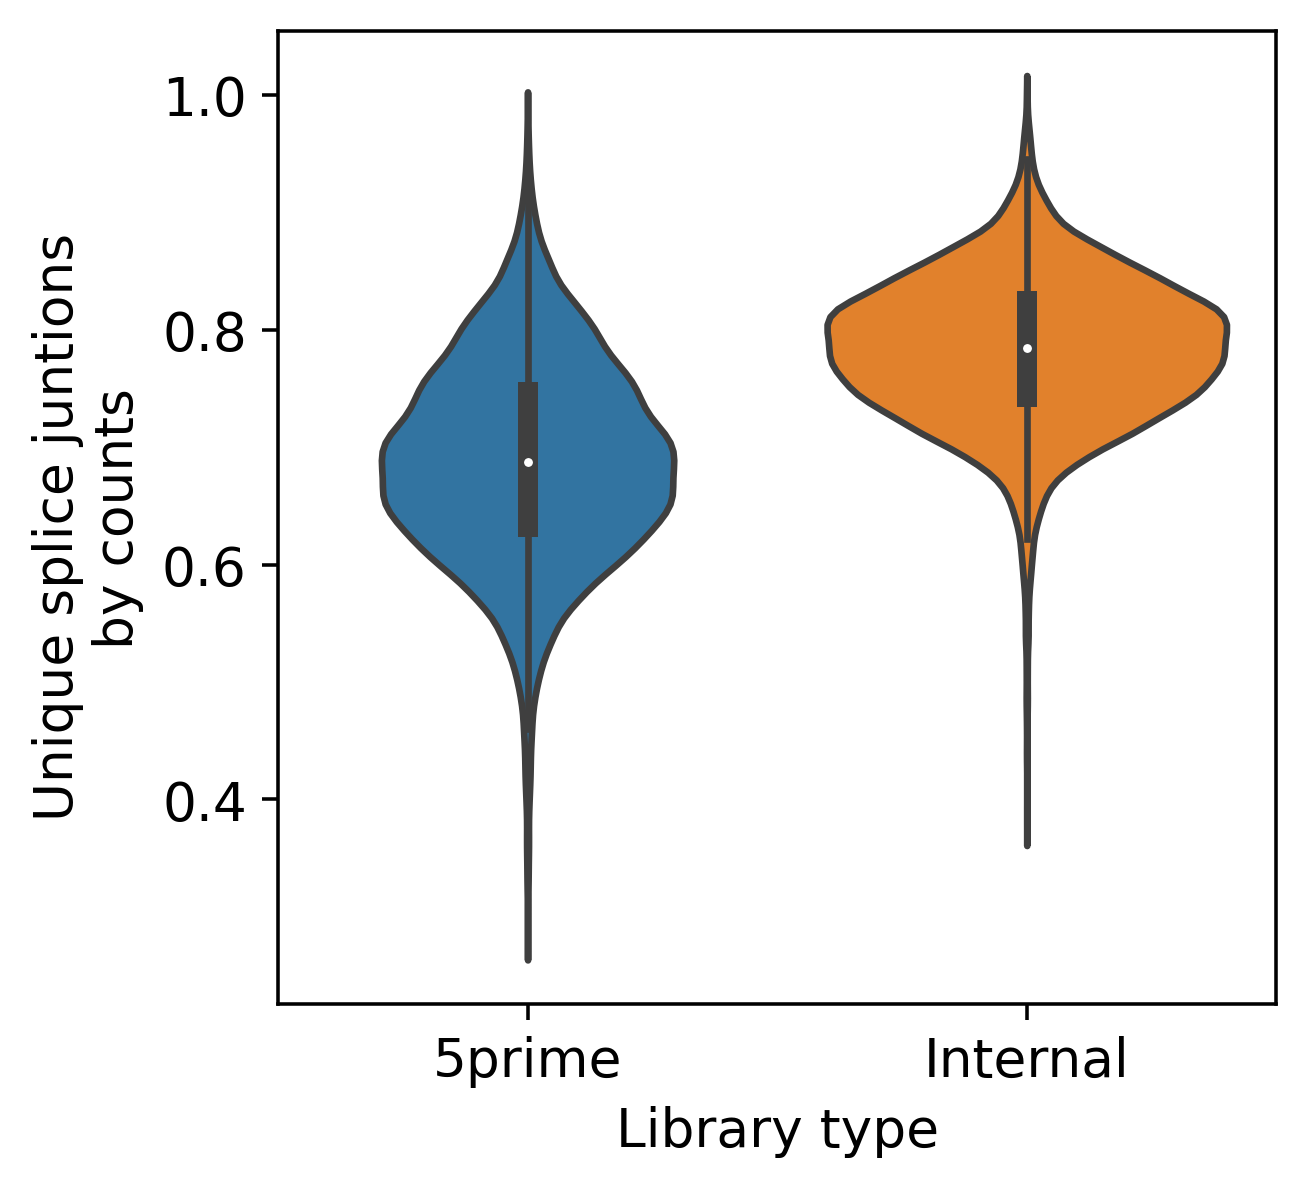

In [214]:
fig, ax = plt.subplots(1,1)

sns.violinplot(data=adata.obs, 
               x='batch',
               y='ratio', ax=ax
              )

# sns.stripplot(data=adata.obs,
#             x="batch", 
#             y="ratio", 
#                    color="black", edgecolor="gray",
#               size=.5,
#               ax=ax
#          )


ax.grid(False)

ax.set_xticklabels(['5prime', 'Internal'],fontsize=12)
ax.set_yticklabels(['0.2','0.4','0.6','0.8','1.0'],fontsize=12)



ax.set_ylabel("Unique splice juntions \n by counts ", fontsize=12)
ax.set_xlabel('Library type', fontsize=12)

#fig.savefig(output_dir + 'comparison_SJ_ratio_violins.pdf')

In [232]:
adata_ = adata.copy()

In [233]:
sc.pp.filter_genes(adata_,min_cells=100) 

In [234]:
sc.pp.calculate_qc_metrics(adata_,inplace=True)

In [235]:
adata_.obs['ratio'] = adata_.obs.n_genes_by_counts/adata_.obs.total_counts

/scratch/derek/ipykernel_44564/3128581577.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0.2','0.4','0.6','0.8','1.0'],fontsize=12)


Text(0.5, 0, 'Library type')

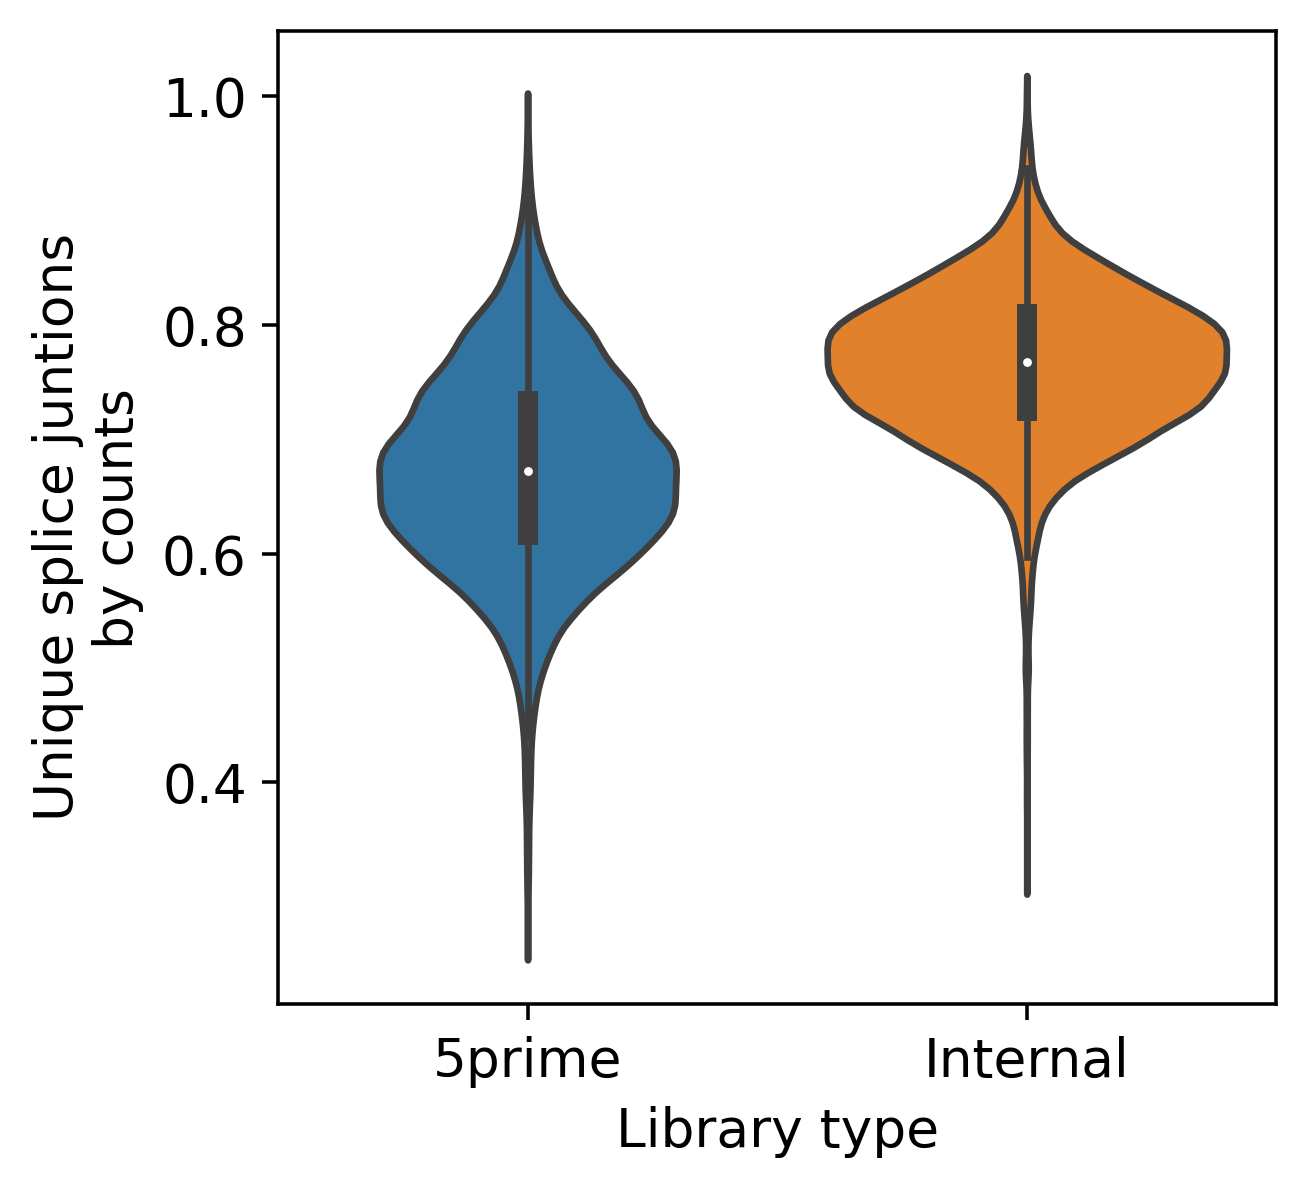

In [236]:
fig, ax = plt.subplots(1,1)

sns.violinplot(data=adata_.obs, 
               x='batch',
               y='ratio', ax=ax
              )

# sns.stripplot(data=adata.obs,
#             x="batch", 
#             y="ratio", 
#                    color="black", edgecolor="gray",
#               size=.5,
#               ax=ax
#          )


ax.grid(False)

ax.set_xticklabels(['5prime', 'Internal'],fontsize=12)
ax.set_yticklabels(['0.2','0.4','0.6','0.8','1.0'],fontsize=12)



ax.set_ylabel("Unique splice juntions \n by counts ", fontsize=12)
ax.set_xlabel('Library type', fontsize=12)

#fig.savefig(output_dir + 'comparison_SJ_ratio_violins.pdf')

In [66]:
adata_5prime.var

,chromosome,end,intron_motif,start,strand,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
GL000008.2:12715-22765,GL000008.2,22765.0,2.0,12715.0,2.0,0,0.0,0.0,100.0,0.0,0.0
GL000008.2:135174-155429,GL000008.2,155429.0,1.0,135174.0,1.0,0,0.0,0.0,100.0,0.0,0.0
GL000008.2:163999-164602,GL000008.2,164602.0,2.0,163999.0,2.0,0,0.0,0.0,100.0,0.0,0.0
GL000008.2:179807-181192,GL000008.2,181192.0,2.0,179807.0,2.0,0,0.0,0.0,100.0,0.0,0.0
GL000008.2:181357-185414,GL000008.2,185414.0,2.0,181357.0,2.0,0,0.0,0.0,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
chrY:9878781-9884294,chrY,9884294.0,0.0,9878781.0,0.0,0,0.0,0.0,100.0,0.0,0.0
chrY:9897580-9943766,chrY,9943766.0,2.0,9897580.0,2.0,0,0.0,0.0,100.0,0.0,0.0
chrY:9962556-10132999,chrY,10132999.0,1.0,9962556.0,1.0,0,0.0,0.0,100.0,0.0,0.0
chrY:9968326-10220275,chrY,10220275.0,1.0,9968326.0,1.0,0,0.0,0.0,100.0,0.0,0.0


In [65]:
adata_internal

AnnData object with n_obs × n_vars = 20673 × 1265740
    obs: 'celltype', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log10_n_genes'
    var: 'chromosome', 'end', 'intron_motif', 'start', 'strand', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [ ]:
adata_internal_sample

In [ ]:
input_dir= "/nowakowskilab/data1/HDD-2/derek/SLR_temp/CAT_20220904_PBMC/"

adata = sc.read_h5ad(input_dir+'/concat.3.new.h5ad')

In [ ]:
adata = adata[(adata.obs['pool_well'] == '5_1') | (adata.obs['pool_well'] == '5_2')]

In [ ]:
# adata.obs